In [1]:
%pylab inline
import emeraldtriangles
import numpy as np
import pandas as pd
import triangle
import scipy.spatial


Populating the interactive namespace from numpy and matplotlib


# Example data

Data from [Matplotlib demos](https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/tripcolor_demo.html#sphx-glr-gallery-images-contours-and-fields-tripcolor-demo-py)

In [2]:
from example_data import tri

In [22]:
tri.keys()

dict_keys(['triangles', 'vertices', 'points'])

In [26]:
tri["triangles"].head()

,0,1,2,facecolors
0,67,66,1,0.968787
1,65,2,66,0.965486
2,1,66,2,0.974991
3,64,2,65,0.958970
4,63,3,64,0.936415


In [27]:
tri["vertices"].head()

,X,Y,color
0,-0.101,0.872,0.0
1,-0.080,0.883,0.0
2,-0.069,0.888,0.0
3,-0.054,0.890,0.0
4,-0.045,0.897,0.0


In [28]:
tri["points"].head()

,X,Y,color
0,-0.050,0.883,1.0
1,-0.025,0.890,1.0
2,-0.050,0.900,1.0
3,-0.020,0.900,1.0
4,-0.070,0.980,1.0


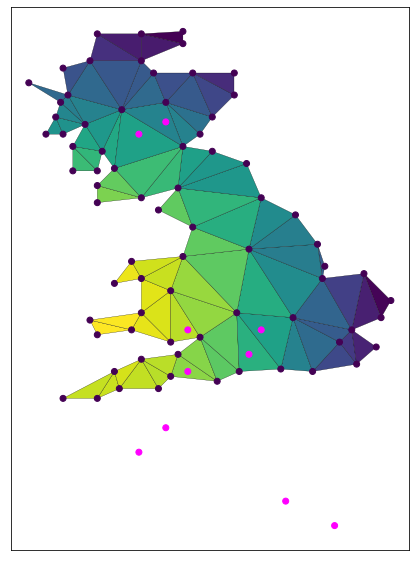

In [3]:
fig = plt.figure(figsize=(10,10))
ax = plt.gca()
ax.set_aspect('equal')
emeraldtriangles.plot(plt.gca(), **tri)
plt.show()

# Point-in-triangle test

Like point-in-polygon, but fast across a large number of triangles

In [4]:
points_and_triangles = emeraldtriangles.points_in_triangles(**tri)
points_and_triangles

,point,triangle
0,0,4
1,1,16
2,2,20
3,3,17
4,4,57
5,5,60
6,6,-1
7,7,-1
8,8,-1
9,9,-1


# Adding points to a mesh

Split triangles in a mesh to add new nodes to the mesh

In [5]:
trip = emeraldtriangles.replace_triangles(**tri)

In [6]:
trip["vertices"].loc[trip["leftover"], "color"] = 0.5

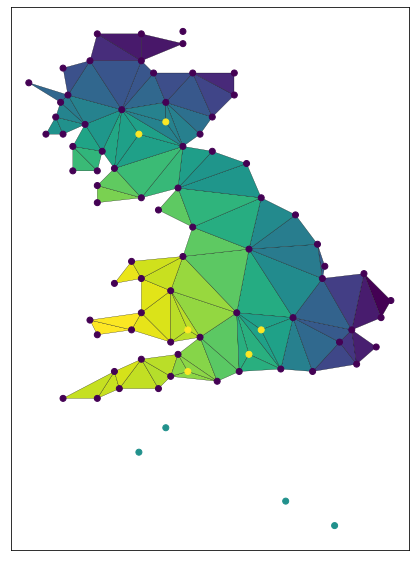

In [7]:
fig = plt.figure(figsize=(10,10))
ax = plt.gca()
ax.set_aspect('equal')
emeraldtriangles.plot(plt.gca(), **trip)
plt.show()

In [8]:
# emeraldtriangles.append_nodes(points, triangle_nodes, triangle_faces)

In [9]:
trib = emeraldtriangles.supplant_triangles(**trip)

In [10]:
# Set the "color" of new triangles to 1.5
trib["triangles"] = trib["triangles"].fillna(1.5)

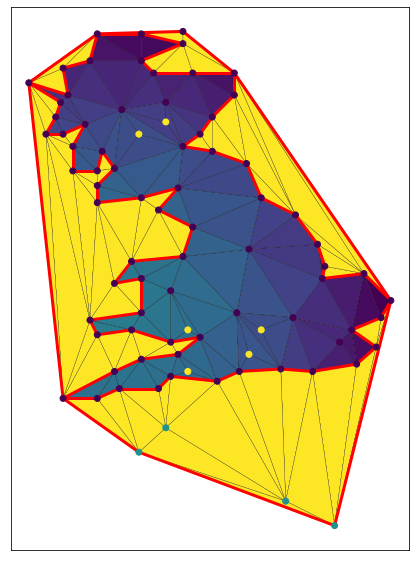

In [11]:
fig = plt.figure(figsize=(10,10))
ax = plt.gca()
ax.set_aspect('equal')
trib = dict(trib)
del trib["holes"]
emeraldtriangles.plot(ax, **trib)
plt.show()

# Mesh boundary polygon

Calculate the boundary edges of a mesh, as well as transform those edges into a polygon.

In [17]:
trip2 = emeraldtriangles.mesh_boundary(**tri)

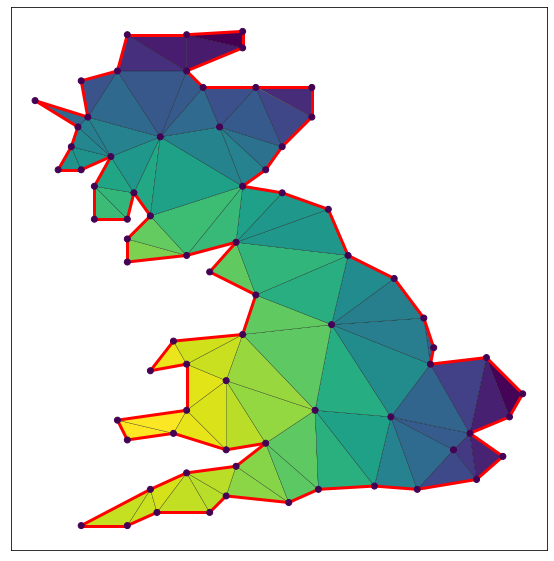

In [18]:
fig = plt.figure(figsize=(10,10))
ax = plt.gca()
ax.set_aspect('equal')
del trip2["points"]
emeraldtriangles.plot(ax, **trip2)
plt.show()

In [19]:
boundaries = emeraldtriangles.mesh_boundary_to_pointlists(**trip2)

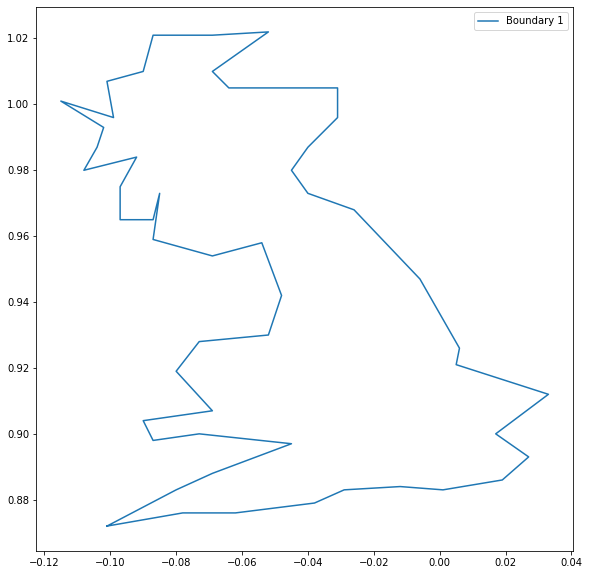

In [20]:
fig = plt.figure(figsize=(10,10))
plt.gca().set_aspect('equal')
for idx, boundary in boundaries.items():
    boundary = tri["vertices"].loc[boundary]
    plt.plot(boundary["X"], boundary["Y"], label="Boundary %s" % idx)
plt.legend()
plt.show()